In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Disable warnings
import warnings
warnings.filterwarnings("ignore")

In [47]:
hour_df = pd.read_csv(r"C:\Users\trilo\Downloads\bike_sharing_project\bike_sharing_project\data\hour.csv")

# Shape of df
print(hour_df.shape)

(17379, 17)


- #Rows = 17379 and #Columns = 17

In [49]:
# head of data
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [64]:
# information about data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- No Missing data

In [71]:
# Check duplicated data
print("Duplicated values (hour.csv) :", hour_df.duplicated().sum())

Duplicated values (hour.csv) : 0


In [118]:
# Unique Count
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [114]:
# Stats of each feature
hour_df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


- The average number of bike rentals per hour (cnt) is 189 bikes, with a maximum of 977.
- Registered users consistently rent more bikes than casual users.
- The average temperature is around 0.49

In [116]:
# Quick overview of categorical features distribution
print("Season distribution in daily data:")
season_name = hour_df['season'].value_counts()
display(season_name.to_frame())

print("\nWeather condition distribution in daily data:")
weather_condition = hour_df['weathersit'].value_counts()
display(weather_condition.to_frame())

print("\nWorkingday distribution in daily data:")
workingday = hour_df['workingday'].value_counts()
display(workingday.to_frame())

print("\nHoliday distribution in daily data:")
holiday = hour_df['holiday'].value_counts()
display(holiday.to_frame())


# The season column was mapped to more readable labels:
# 1 → Spring
# 2 → Summer
# 3 → Fall
# 4 → Winter
# The weathersit column was mapped to more descriptive weather conditions:
# 1 → Clear/Partly Cloudy
# 2 → Mist/Cloudy
# 3 → Light Precipitation
# 4 → Heavy Precipitation

Season distribution in daily data:


,count
season,
3,4496
2,4409
1,4242
4,4232



Weather condition distribution in daily data:


,count
weathersit,
1,11413
2,4544
3,1419
4,3



Workingday distribution in daily data:


,count
workingday,
1,11865
0,5514



Holiday distribution in daily data:


,count
holiday,
0,16879
1,500


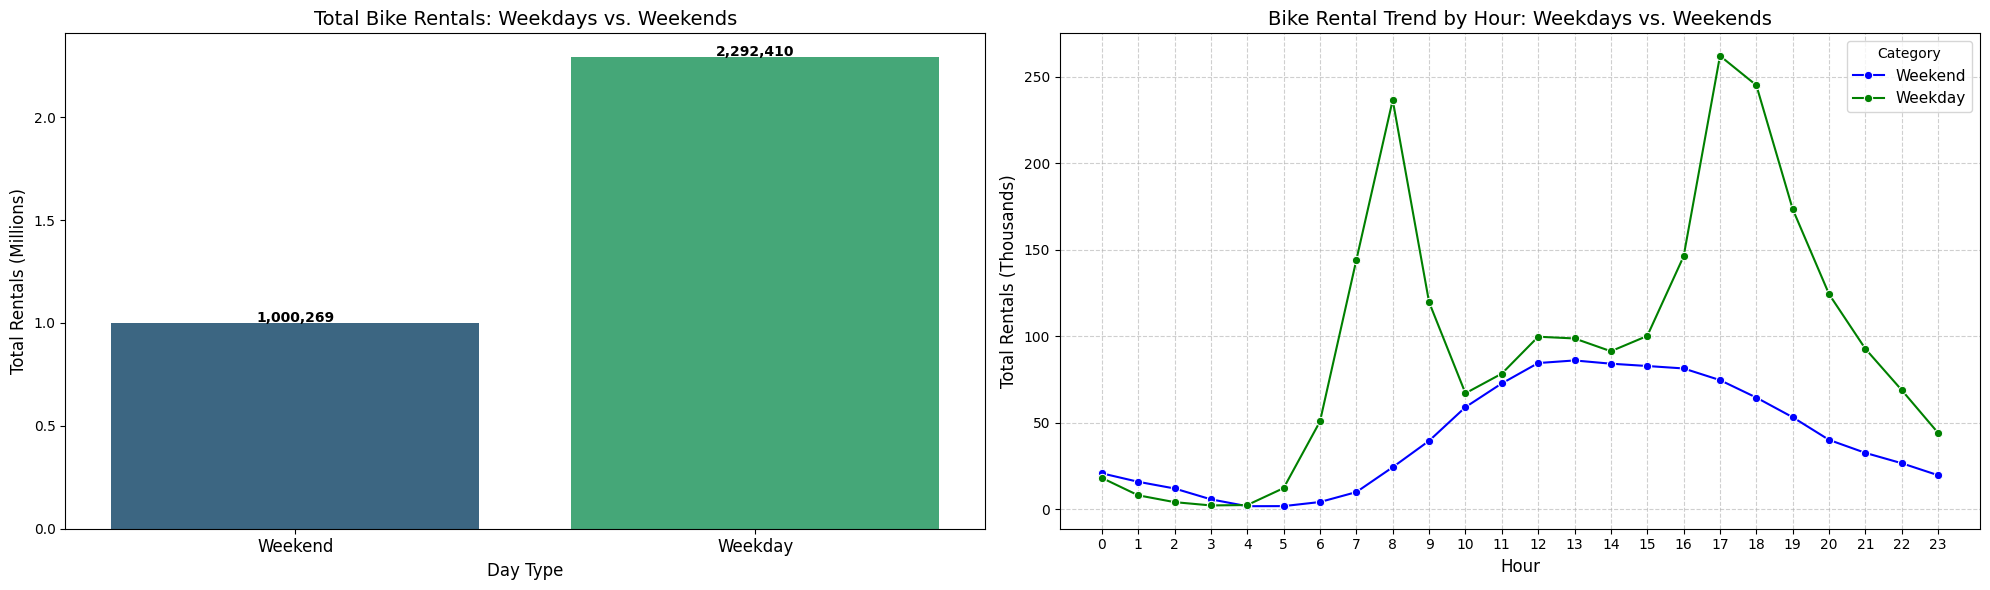

In [141]:
# Create visualizations in 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Grouped Bar Chart - Total Bike Rentals on Weekdays vs. Weekends
sns.barplot(x="workingday", y="cnt", data=hour_df, estimator=sum, ci=None, palette="viridis", ax=axes[0])
axes[0].set_title("Total Bike Rentals: Weekdays vs. Weekends", fontsize=14)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Weekend", "Weekday"], fontsize=12)
axes[0].set_ylabel("Total Rentals (Millions)", fontsize=12)
axes[0].set_xlabel("Day Type", fontsize=12)
axes[0].yaxis.set_major_formatter(lambda x, _: f"{x/1e6:.1f}")

# Add value labels above each bar
for i, v in enumerate(hour_df.groupby("workingday")["cnt"].sum()):
    axes[0].text(i, v + 3000, f"{v:,.0f}", ha="center", fontsize=10, fontweight="bold")

# Line Chart - Rental Trend Throughout the Day: Weekdays vs. Weekends
sns.lineplot(x="hr", y="cnt", hue="workingday", data=hour_df, estimator=sum, ci=None, marker="o", palette=["blue", "green"], ax=axes[1])
axes[1].set_title("Bike Rental Trend by Hour: Weekdays vs. Weekends", fontsize=14)
axes[1].set_ylabel("Total Rentals (Thousands)", fontsize=12)
axes[1].set_xlabel("Hour", fontsize=12)
axes[1].set_xticks(range(0, 24, 1))
axes[1].grid(axis="both", linestyle="--", alpha=0.6)
axes[1].legend(["Weekend", "Weekday"], title="Category", fontsize=11)
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x/1e3:.0f}"))

plt.tight_layout()
plt.show()


- Bike rentals on weekdays are approximately 2 times higher than on weekends

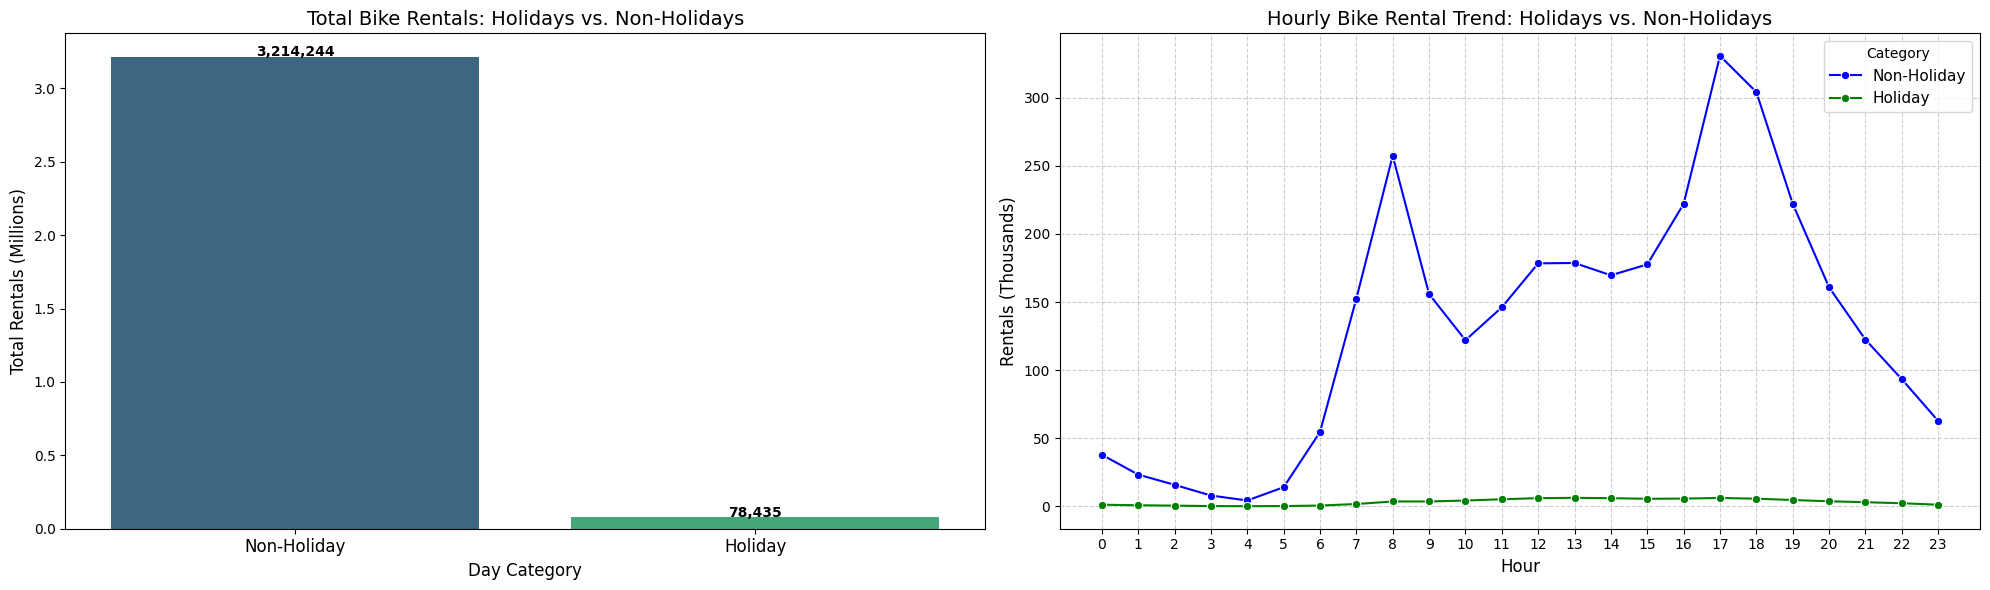

In [143]:
# Create visualizations in 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Grouped Bar Chart - Total Rentals on Holidays vs. Non-Holidays
sns.barplot(x="holiday", y="cnt", data=hour_df, estimator=sum, ci=None, palette="viridis", ax=axes[0])
axes[0].set_title("Total Bike Rentals: Holidays vs. Non-Holidays", fontsize=14)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Non-Holiday", "Holiday"], fontsize=12)
axes[0].set_ylabel("Total Rentals (Millions)", fontsize=12)
axes[0].set_xlabel("Day Category", fontsize=12)

# Format y-axis labels in millions for readability
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x/1e6:.1f}"))

# Add value labels above each bar
for i, v in enumerate(hour_df.groupby("holiday")["cnt"].sum()):
    axes[0].text(i, v + 3000, f"{v:,.0f}", ha="center", fontsize=10, fontweight="bold")

# Line Chart - Rental Trends on Holidays vs. Non-Holidays
sns.lineplot(x="hr", y="cnt", hue="holiday", data=hour_df, estimator=sum, ci=None, marker="o", palette=["blue", "green"], ax=axes[1])
axes[1].set_title("Hourly Bike Rental Trend: Holidays vs. Non-Holidays", fontsize=14)
axes[1].set_ylabel("Rentals (Thousands)", fontsize=12)
axes[1].set_xlabel("Hour", fontsize=12)
axes[1].set_xticks(range(0, 24, 1))  # Set x-axis grid to 24 hours
axes[1].grid(axis="both", linestyle="--", alpha=0.6)  # Add grid lines
axes[1].legend(["Non-Holiday", "Holiday"], title="Category", fontsize=11)

# Format y-axis in thousands
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x/1e3:.0f}"))

plt.tight_layout()
plt.show()


- Bike rentals on regular (non-holiday) days are significantly higher than on holidays
- Non-holidays show a structured rental pattern with significant spikes in the morning (07:00–09:00) and evening (17:00–19:00), indicating commuting behavior.

# We can do more EDA